<a href="https://colab.research.google.com/github/chobocoding/deeplearning/blob/main/auto_encoder(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data preparation

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms

mnist_train = MNIST("./", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = MNIST("./", train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=256, shuffle=False)

### 2. Constructing a neural network

In [4]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 300)
        self.fc3 = nn.Linear(300, 2)
        self.relu = nn.ReLU()
        
    def forward(self, x):  # x: Bx1x28x28 -> Bx784
        out = x.view(-1, 784)
        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [5]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(2, 300)
        self.fc2 = nn.Linear(300, 500)
        self.fc3 = nn.Linear(500, 784)
        self.relu = nn.ReLU()

    def forward(self, x):  # x: Bx2
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        out = out.view(-1, 1, 28, 28)
        return out

In [6]:
device = torch.device("cuda:0")
encoder = Encoder().to(device)
decoder = Decoder().to(device)

### 3. Loss function and optimization method

In [7]:
parameters = list(encoder.parameters()) + list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=0.0005)

### 4. Tranining the neural network

In [8]:
for epoch in range(100):
    loss_val = 0
    for itr, data in enumerate(train_loader):
        optimizer.zero_grad()
        image, label = data
        image = image.to(device)
        label = label.to(device)
        output = encoder(image)
        output = decoder(output)

        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

        loss_val += loss.item()
        
    print("Epoch:", epoch+1, "  , Loss:", loss_val)
    if loss_val <= 9.2: break

Epoch: 1   , Loss: 12.558832738548517
Epoch: 2   , Loss: 10.53615103662014
Epoch: 3   , Loss: 10.030294556170702
Epoch: 4   , Loss: 9.728635184466839
Epoch: 5   , Loss: 9.505878619849682
Epoch: 6   , Loss: 9.342088893055916
Epoch: 7   , Loss: 9.187574706971645


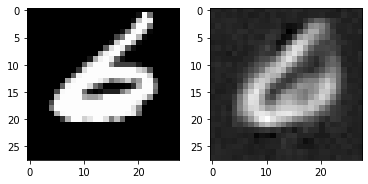

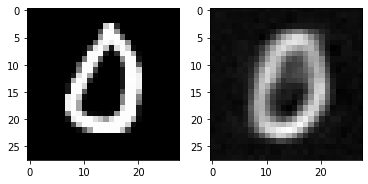

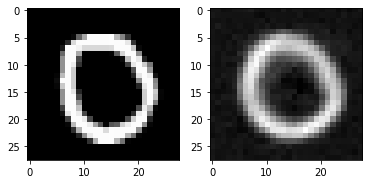

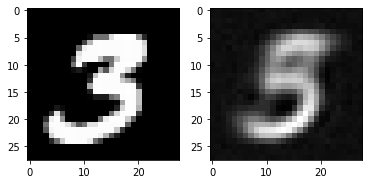

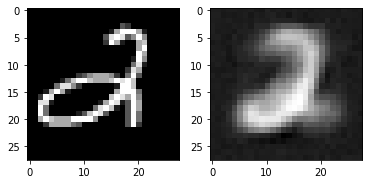

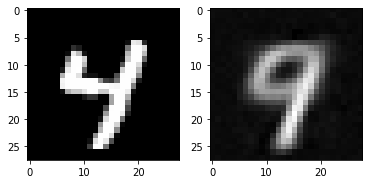

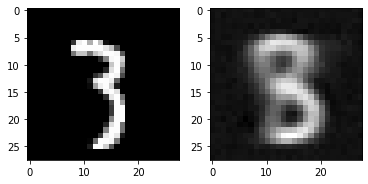

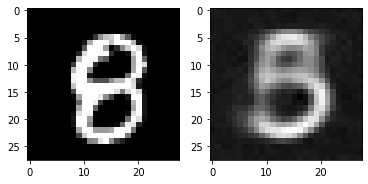

In [9]:
out_img = torch.squeeze(output.cpu().data)

for i in range(8):
    plt.subplot(1, 2, 1)
    plt.imshow(torch.squeeze(image[i]).cpu().numpy(), cmap='gray') 
    plt.subplot(1, 2, 2)
    plt.imshow(out_img[i].numpy(), cmap='gray')
    plt.show()

### 5. Image generation

In [10]:
# encoder : Bx2
latent_vec = torch.rand(10,2).to(device)
#latent_vec = latent_vec*(-3)+2
generated_sample = decoder(latent_vec)

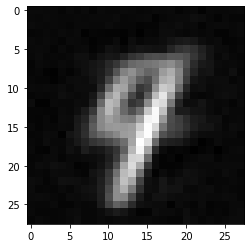

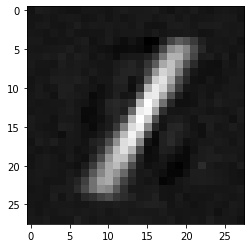

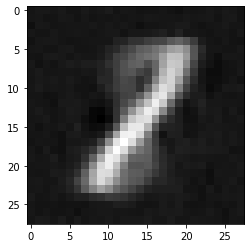

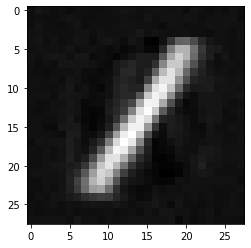

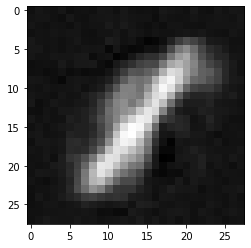

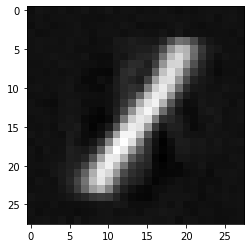

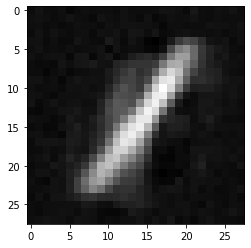

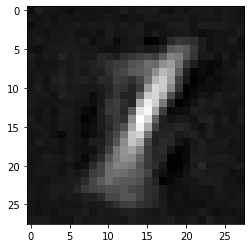

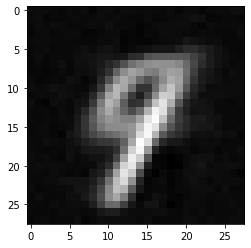

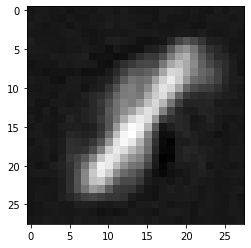

In [11]:
for i in range(len(generated_sample)):
    plt.imshow(torch.squeeze(generated_sample)[i].cpu().detach().numpy(), cmap='gray')
    plt.show()